In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt

In [3]:
ROOT = "/content/drive/MyDrive/Colab Notebooks/DM/논문참조"

In [4]:
df = pd.read_csv(f'{ROOT}/data/교내 주제선택 분반_위도경도 통합.csv', encoding = 'cp949')

In [5]:
mean_std_cnt = df["학생수"].mean()
df["학생수"].fillna(mean_std_cnt, inplace = True)

In [6]:
df_notnull = df[df.notnull().all(axis = 1)]

In [7]:
student_count = df_notnull["학생수"]
budget = df_notnull["예산(만원)"]

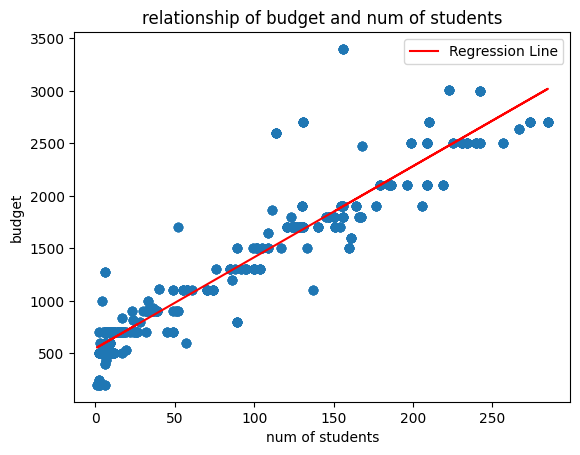

R-squared: 0.8870586729578973


In [10]:
# 회귀 분석을 위한 상수 열 추가
X = sm.add_constant(student_count)

# OLS 모델 적합
model = sm.OLS(budget, X)
results = model.fit()

# 회귀선 그리기
plt.scatter(student_count, budget)
plt.plot(student_count, results.fittedvalues, 'r-', label='Regression Line')
plt.xlabel('num of students')
plt.ylabel('budget')
plt.title('relationship of budget and num of students')
plt.legend()
plt.show()

# R 제곱 값 계산
r_squared = results.rsquared
print('R-squared:', r_squared)


In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 예산(만원)   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     9723.
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        19:19:22   Log-Likelihood:                -8595.1
No. Observations:                1240   AIC:                         1.719e+04
Df Residuals:                    1238   BIC:                         1.720e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        547.8545     10.691     51.243      0.000     526.879     568.830
학생수            8.6753      0.088     98.608      0.000       8.503       8.848
==============================================================================
Omnibus:                      720.044   Durbin-Watson:                   0.311
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8075.037
Skew:                           2.497   Prob(JB):                         0.00
Kurtosis:                      14.461   Cond. No.                         184.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
(intercept, slope) = results.params

In [13]:
for idx, row in df.iterrows():
    if math.isnan(row["예산(만원)"]):
        df.loc[idx, "예산(만원)"] = int(intercept + row["학생수"] * slope)

In [14]:
df.to_csv(f"{ROOT}/data/교내 주제선택 분반_위도경도 통합_null값 반영.csv", index = False)